In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import skimage.io as sio
import math
import shapely
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import matplotlib

In [144]:
#Variables para cambiar!!!!
x0=-73.2
x1=-74.4
y0=6.8
y1=7.6
nam,z0,z1='Perfil',0,40
#Variables para cambiar!!!!
data=pd.read_csv('arreglos_3d.csv')
max_val=data['value'].max()
min_val=data['value'].min()
ls=[]
d=[]
for x,y in zip(data.x,data.y):
    c = Point(x, y).buffer(0.05)
    l = LineString([(x0,y0), (x1, y1)])
    i = c.intersection(l)
    if i:
        ls.append(True)
        d.append(np.sqrt(((x0-x)**2)+(y0-y)**2))
    else:
        ls.append(False)
        d.append(np.sqrt(((x0-x)**2)+(y0-y)**2))
data['d']=d
data1=data[ls]

mesh_geo=data1.pivot(index='z', columns='d',values='value')
image = mesh_geo.values
# Part extracted from https://stackoverflow.com/questions/43442925/color-coding-using-scalar-mappable-in-matplotlib
cmap= plt.cm.bone_r
norm = matplotlib.colors.Normalize(vmin=min_val, vmax=max_val) 
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)   
facecolors=cmap(norm(image))
# End of the estrcation


#Ojo!!!
image = facecolors
zs,xys,_=image.shape
zs,xys=int(zs),int(xys)
yy = np.linspace(y0,y1, xys)
zz = np.linspace(z1,z0, zs)
yy, zz = np.meshgrid(yy, zz)
x_data=list(np.linspace(x0,x1, xys))
x_data=[x_data]*zs
xx=np.concatenate(x_data).reshape(yy.shape)
img = image[:,:, 1]
ima_surface=go.Surface(name=str(nam),hovertemplate=str(nam),x=xx, y=yy, z=zz, surfacecolor= np.flipud(img), colorscale='jet', showscale=False)

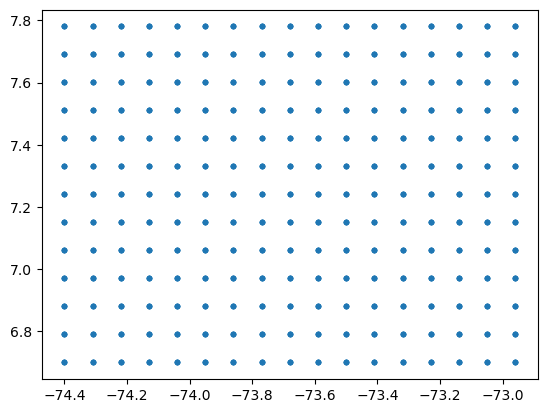

In [118]:
plt.plot(data.x,data.y,'.')

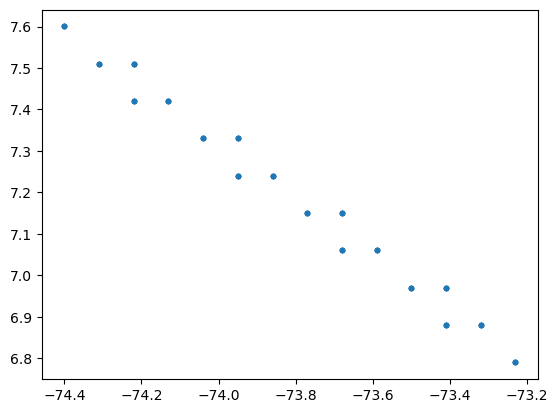

In [147]:
plt.plot(data1.x,data1.y,'.')

In [148]:
mesh_geo

d,0.031509,0.144142,0.224636,0.270125,0.344754,0.468674,0.545848,0.594022,0.668850,0.793206,0.869529,0.918368,0.993230,1.117738,1.193672,1.242811,1.317685,1.442270
z,,,,,,,,,,,,,,,,,,
0.0,0.003772,0.003702,0.003682,0.003690,0.003696,0.003650,0.003644,0.003724,0.003734,0.003735,0.003708,0.003646,0.003615,0.003607,0.003558,0.003562,0.003559,0.003567
10.0,0.003768,0.003688,0.003708,0.003702,0.003709,0.003664,0.003675,0.003724,0.003719,0.003745,0.003731,0.003662,0.003631,0.003614,0.003565,0.003571,0.003556,0.003565
20.0,0.003774,0.003689,0.003688,0.003717,0.003687,0.003690,0.003688,0.003725,0.003744,0.003748,0.003733,0.003674,0.003633,0.003631,0.003592,0.003607,0.003567,0.003579
30.0,0.003798,0.003711,0.003702,0.003745,0.003715,0.003688,0.003682,0.003751,0.003761,0.003756,0.003741,0.003684,0.003649,0.003644,0.003585,0.003599,0.003628,0.003612
40.0,0.003851,0.003736,0.003691,0.003708,0.003700,0.003692,0.003694,0.003747,0.003780,0.003775,0.003729,0.003682,0.003665,0.003640,0.003657,0.003648,0.003636,0.003598


In [145]:
go.Figure(ima_surface)